In [47]:
# max movie year vs budgeting

In [1]:
import pandas as pd
df = pd.read_csv("netflix.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
#1: What is the ratio of Movies vs TV Shows on Netflix?

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
Ratio of Movies to TV Shows: 2.29 : 1
Movies: 69.6%
TV Shows: 30.4%


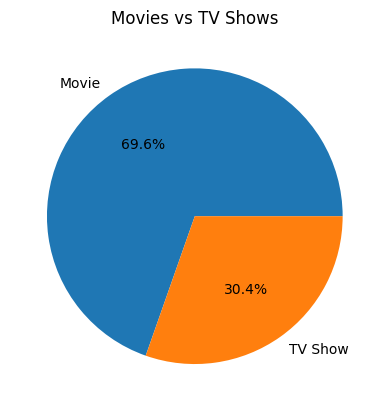

In [44]:
type_counts = df['type'].value_counts()
print(type_counts)


# answer for ratio between movies and tv shows
movie_count = type_counts.get('Movie', 0)
tv_count = type_counts.get('TV Show', 0)

ratio = movie_count / tv_count
print(f"Ratio of Movies to TV Shows: {ratio:.2f} : 1")


total = movie_count + tv_count
print(f"Movies: {movie_count/total*100:.1f}%")
print(f"TV Shows: {tv_count/total*100:.1f}%")


import matplotlib.pyplot as plt

type_counts.plot(kind='pie', autopct='%1.1f%%', title='Movies vs TV Shows')
plt.ylabel('')
plt.show()


In [38]:
#2:  Which genres are most popular on Netflix globally?


International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

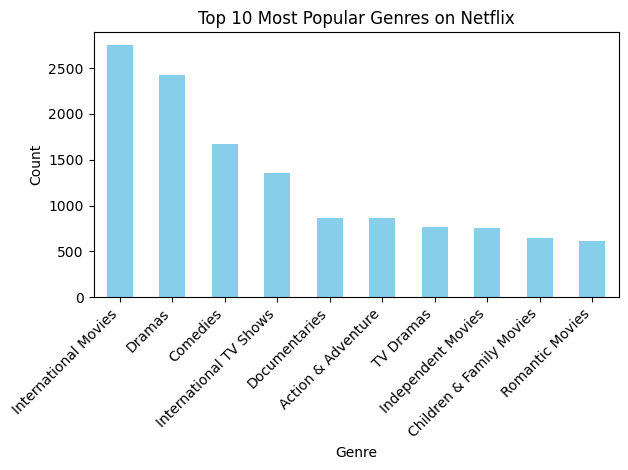

In [23]:

# Split genres correctly
df_genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)

# Count frequency
genre_counts = df_genres.value_counts()
print(genre_counts)

# Plot top 10 genres
import matplotlib.pyplot as plt

top_genres = genre_counts.head(10)
top_genres.plot(kind='bar', color='skyblue', title='Top 10 Most Popular Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
#3:  Which years saw the highest release of content on Netflix?

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64


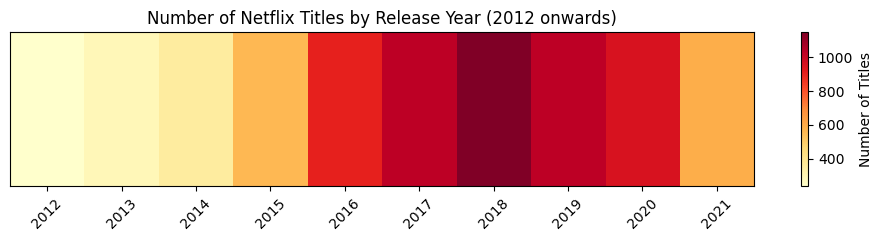

In [32]:
# Count number of titles per release year
year_counts = df['release_year'].value_counts().sort_index()
print(year_counts.tail(10)) 

import matplotlib.pyplot as plt
import numpy as np

# Filter for release_year >= 2012
df_recent = df[df['release_year'] >= 2012]

# Count number of titles per year
year_counts = df_recent['release_year'].value_counts().sort_index()

# Convert to 2D array for heatmap-like plot
heatmap_data = np.array([year_counts.values])

plt.figure(figsize=(12,2))
plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Number of Titles')

# Show only every other year to reduce clutter
years = year_counts.index
plt.xticks(ticks=np.arange(0, len(years), 1), labels=years, rotation=45)
plt.yticks([])

plt.title('Number of Netflix Titles by Release Year (2012 onwards)')
plt.show()


In [40]:
#4: Which countries produce the most Netflix content?


In [34]:
country_counts = df['country'].value_counts()
print(country_counts.head(10))  # top 10 countries


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [37]:
# Some rows might have missing or NaN country values — they are ignored by value_counts()
# Some titles have multiple countries separated by commas

# Split multiple countries into separate rows
df_countries = df['country'].dropna().str.split(', ', expand=True).stack().reset_index(drop=True)

# Count frequency
country_counts = df_countries.value_counts()
print(country_counts.head(10))


United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


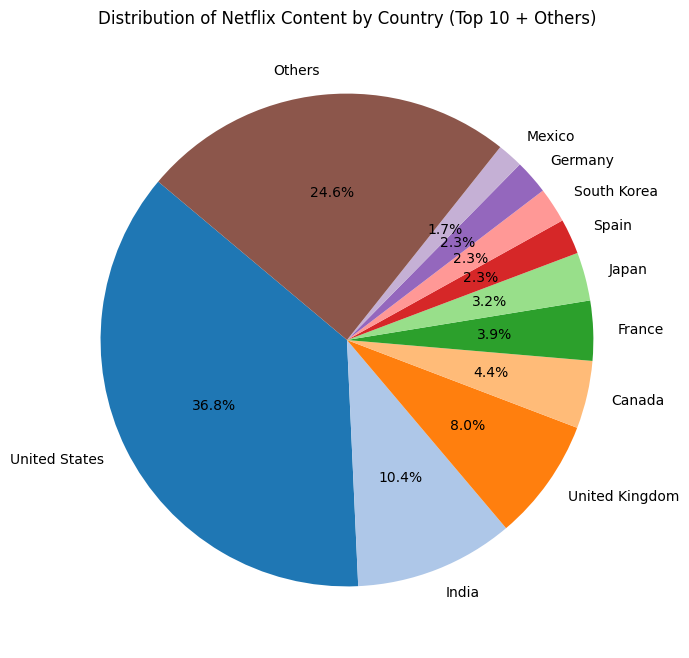

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Split multiple countries into separate rows
df_countries = df['country'].dropna().str.split(', ', expand=True).stack().reset_index(drop=True)

# Count frequency of each country
country_counts = df_countries.value_counts()

# Select top 10 countries
top_countries = country_counts.head(10)
others_count = country_counts[10:].sum()  # combine remaining countries into "Others"

# Combine top 10 and "Others" using pd.concat
pie_data = pd.concat([top_countries, pd.Series({'Others': others_count})])

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Netflix Content by Country (Top 10 + Others)')
plt.show()


In [41]:
#5:  How has the trend of adding new content evolved year by year?

added_year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


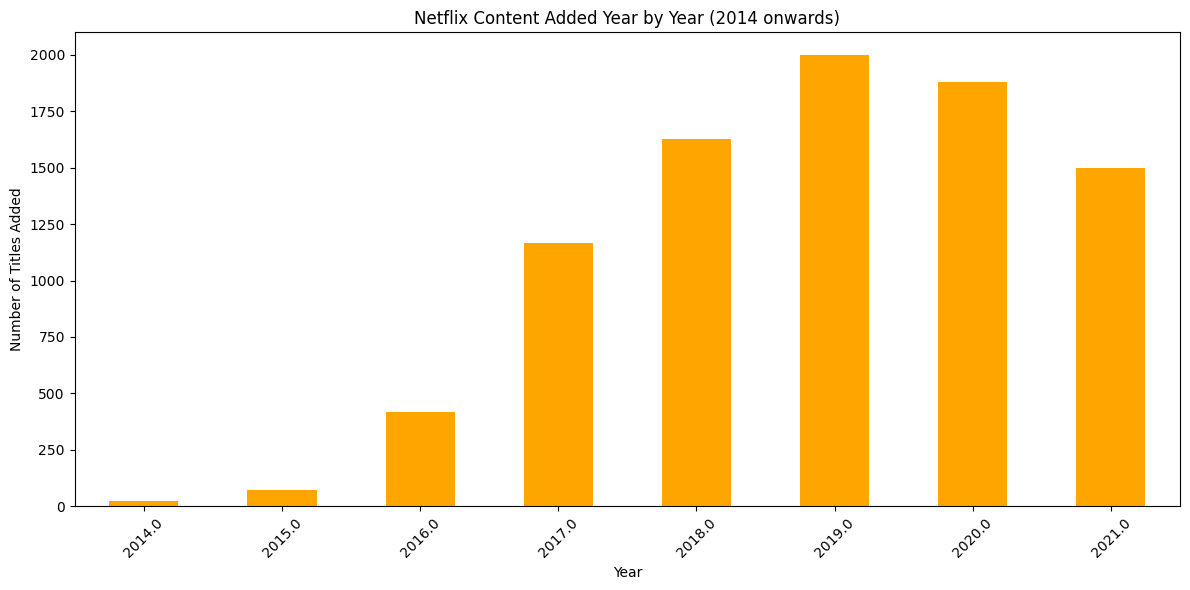

In [46]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['added_year'] = df['date_added'].dt.year

added_counts = df['added_year'].value_counts().sort_index()
print(added_counts)

# Filter for years >= 2014
added_counts_recent = added_counts[added_counts.index >= 2014]

# Plot bar chart
plt.figure(figsize=(12,6))
added_counts_recent.plot(kind='bar', color='orange')
plt.title('Netflix Content Added Year by Year (2014 onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
#6: Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?

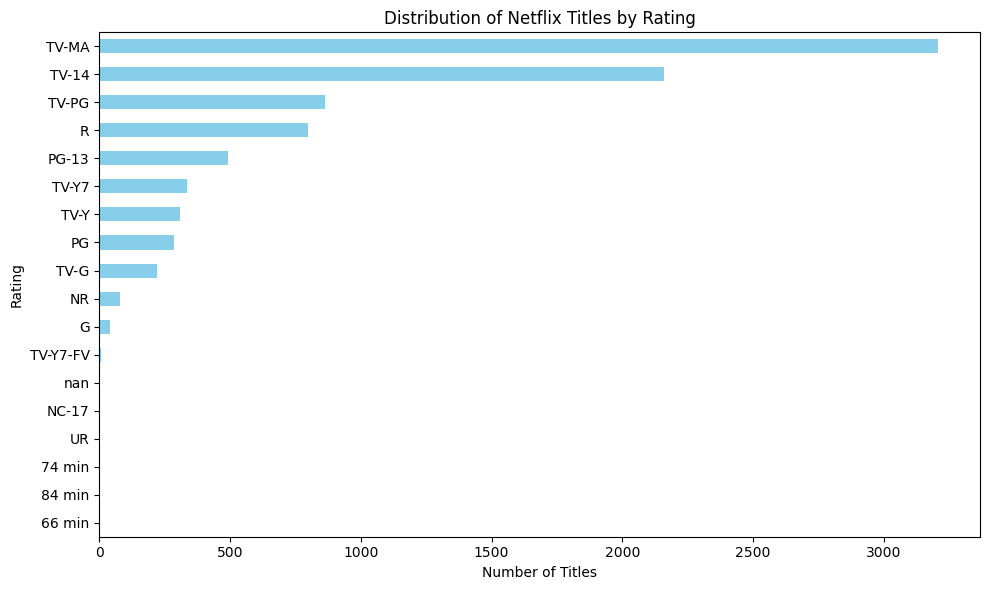

In [54]:
rating_counts = df['rating'].value_counts(dropna=False)

rating_counts = rating_counts.rename({pd.NA: "Unknown", None: "Unknown"})

plt.figure(figsize=(10,6))
rating_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of Netflix Titles by Rating')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [6]:
#7:  Do some countries tend to produce more mature content (TV-MA)?

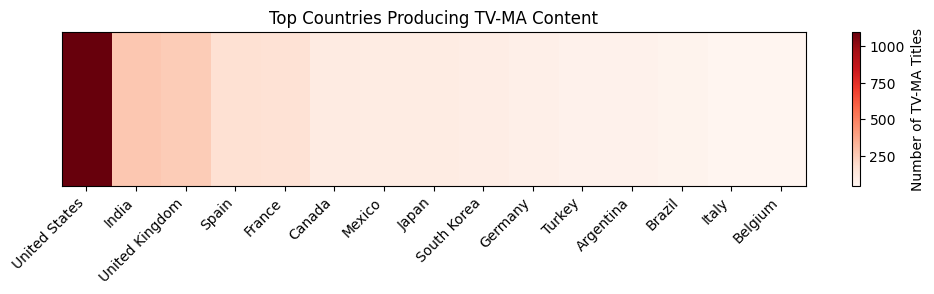

In [60]:
import numpy as np

# Filter for TV-MA titles
tv_ma_df = df[df['rating'] == 'TV-MA']

# Split multiple countries into separate rows
tv_ma_countries = tv_ma_df['country'].dropna().str.split(', ', expand=True).stack().reset_index(drop=True)

# Count TV-MA titles per country
tv_ma_counts = tv_ma_countries.value_counts()

# Optionally, include only top 15 countries for a cleaner heatmap
top_countries = tv_ma_counts.head(15)
heatmap_data = np.array([top_countries.values])

plt.figure(figsize=(12,2))
plt.imshow(heatmap_data, cmap='Reds', aspect='auto')
plt.colorbar(label='Number of TV-MA Titles')

# Label the countries
plt.xticks(ticks=np.arange(len(top_countries)), labels=top_countries.index, rotation=45, ha='right')
plt.yticks([])  # no y-axis needed

plt.title('Top Countries Producing TV-MA Content')
plt.show()

In [5]:
#8: Which genres are more associated with TV Shows vs Movies?

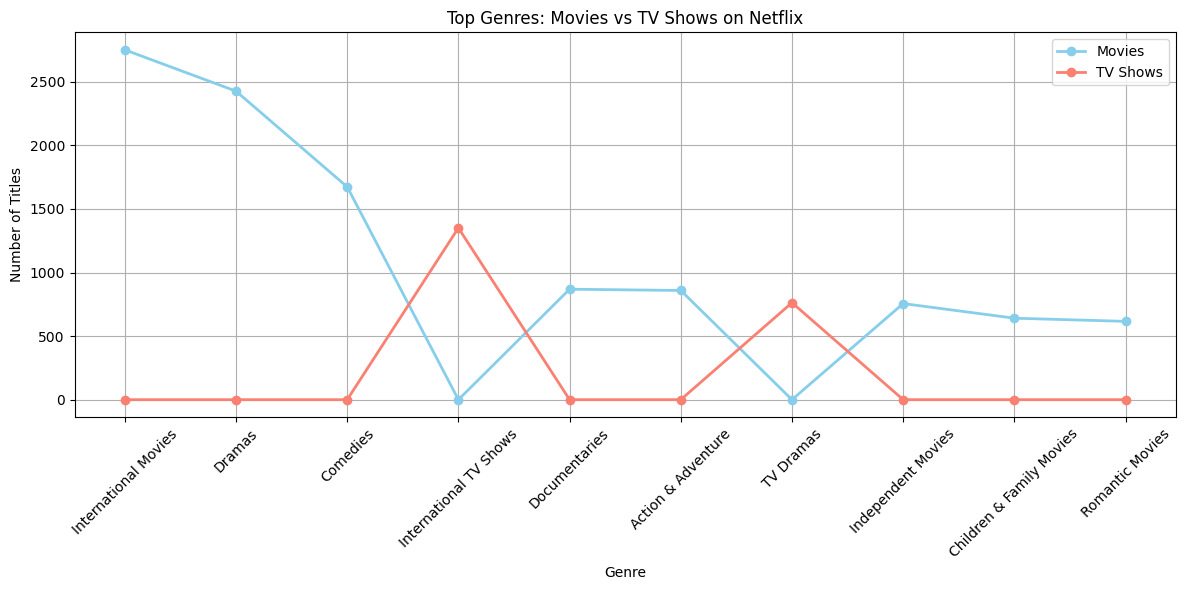

In [64]:
# Split genres into separate rows
df_genres = df[['type', 'listed_in']].dropna()
df_genres = df_genres.assign(listed_in=df_genres['listed_in'].str.split(', ')).explode('listed_in')

# Count genres for each type
genre_type_counts = df_genres.groupby(['type', 'listed_in']).size().unstack(fill_value=0)

# Sum across Movies + TV Shows to find top genres
top_genres = genre_type_counts.sum().sort_values(ascending=False).head(10).index

# Filter the DataFrame to only include top genres
genre_type_counts_top = genre_type_counts[top_genres]

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot Movies line
plt.plot(top_genres, genre_type_counts_top.loc['Movie'], marker='o', label='Movies', color='skyblue', linewidth=2)

# Plot TV Shows line
plt.plot(top_genres, genre_type_counts_top.loc['TV Show'], marker='o', label='TV Shows', color='salmon', linewidth=2)

plt.title('Top Genres: Movies vs TV Shows on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
#9:  Which genres dominate the U.S. vs other countries?

,U.S.,Other Countries
Genre,,
International Movies,166,2377
Dramas,835,1482
Comedies,680,900
International TV Shows,74,1054
Action & Adventure,404,413
Documentaries,512,282
Independent Movies,390,355
TV Dramas,232,431
Romantic Movies,225,363


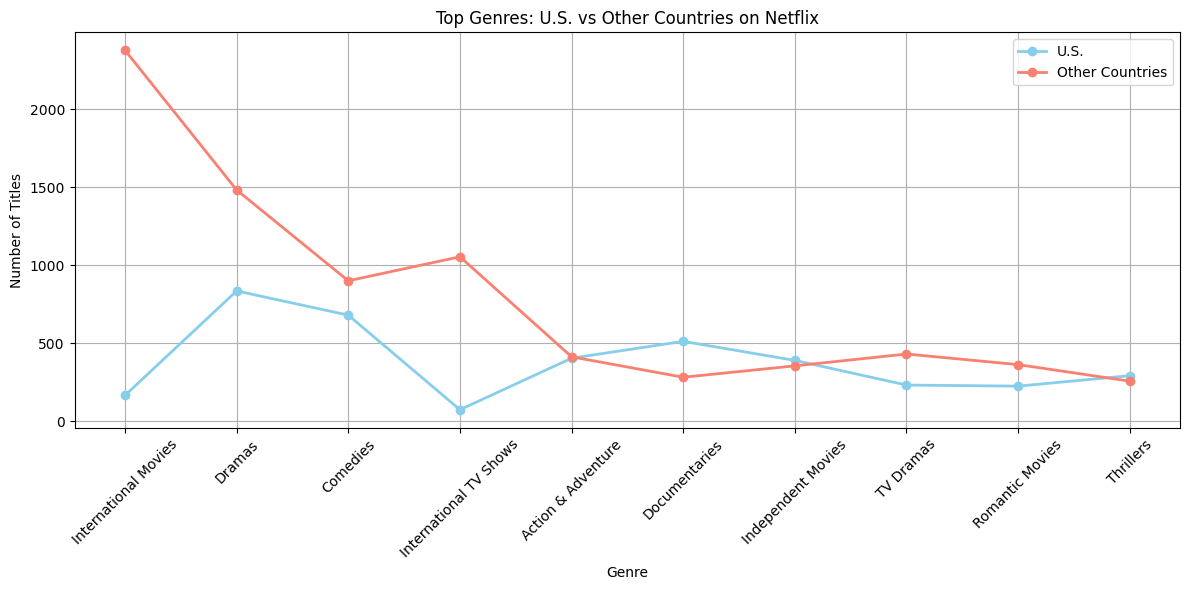

In [70]:
import pandas as pd

# Split genres into separate rows
df_genres = df[['country', 'listed_in']].dropna()
df_genres = df_genres.assign(listed_in=df_genres['listed_in'].str.split(', ')).explode('listed_in')

# Separate U.S. and other countries
us_genres = df_genres[df_genres['country'].str.contains('United States', na=False)]
other_genres = df_genres[~df_genres['country'].str.contains('United States', na=False)]

# Count genres
us_counts = us_genres['listed_in'].value_counts()
other_counts = other_genres['listed_in'].value_counts()

# Select top 10 genres based on combined counts
top_genres = (us_counts + other_counts).sort_values(ascending=False).head(10).index

# Filter counts for top genres
us_top = us_counts.reindex(top_genres, fill_value=0)
other_top = other_counts.reindex(top_genres, fill_value=0)

import pandas as pd
from IPython.display import display

# Combine counts into a DataFrame
genre_comparison = pd.DataFrame({
    'Genre': top_genres,
    'U.S.': us_top.values,
    'Other Countries': other_top.values
})

# Set Genre as index
genre_comparison.set_index('Genre', inplace=True)

# Display the table
display(genre_comparison)



import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# U.S. line
plt.plot(top_genres, us_top.values, marker='o', label='U.S.', color='skyblue', linewidth=2)

# Other countries line
plt.plot(top_genres, other_top.values, marker='o', label='Other Countries', color='salmon', linewidth=2)

plt.title('Top Genres: U.S. vs Other Countries on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
#10:  What genres are most popular in the last 3 years?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset again (make sure the file name is correct)
df = pd.read_csv("netflix.csv")

# Ensure 'date_added' is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Continue from here
latest_year = df['date_added'].dt.year.max()
recent_df = df[df['date_added'].dt.year >= latest_year - 2]  # last 3 years


,Movies,TV Shows
listed_in,,
Action & Adventure,568.0,0.0
Anime Features,51.0,0.0
Anime Series,0.0,126.0
British TV Shows,0.0,130.0
Children & Family Movies,439.0,0.0
Classic & Cult TV,0.0,10.0
Classic Movies,95.0,0.0
Comedies,1135.0,0.0
Crime TV Shows,0.0,289.0


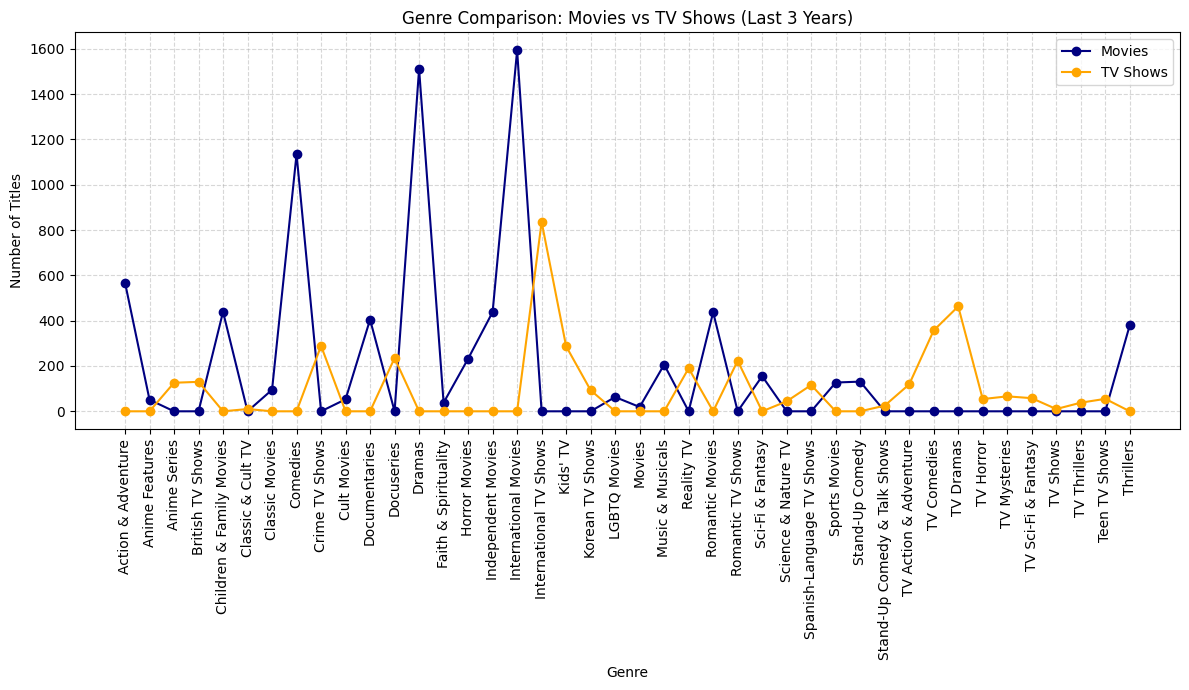

In [4]:
# Ensure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

latest_year = df['date_added'].dt.year.max()
recent_df = df[df['date_added'].dt.year >= latest_year - 2]  # last 3 years

# Drop rows with missing values
recent_genres = recent_df[['type', 'listed_in']].dropna()

# Split and explode genres
recent_genres = recent_genres.assign(listed_in=recent_genres['listed_in'].str.split(', ')).explode('listed_in')

# Count genre frequencies separately
movies_genres = recent_genres[recent_genres['type'] == 'Movie']['listed_in'].value_counts()
tv_genres = recent_genres[recent_genres['type'] == 'TV Show']['listed_in'].value_counts()

genre_compare = pd.DataFrame({
    'Movies': movies_genres,
    'TV Shows': tv_genres
}).fillna(0)

from IPython.display import display
display(genre_compare)

plt.figure(figsize=(12,7))
plt.plot(genre_compare.index, genre_compare['Movies'], color='navy', marker='o', label='Movies')
plt.plot(genre_compare.index, genre_compare['TV Shows'], color='orange', marker='o', label='TV Shows')

plt.title('Genre Comparison: Movies vs TV Shows (Last 3 Years)')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [9]:
#11 :  Who are the top 10 directors with the most Netflix content?

Top 10 Directors with Most Netflix Titles:


,Number of Titles
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12


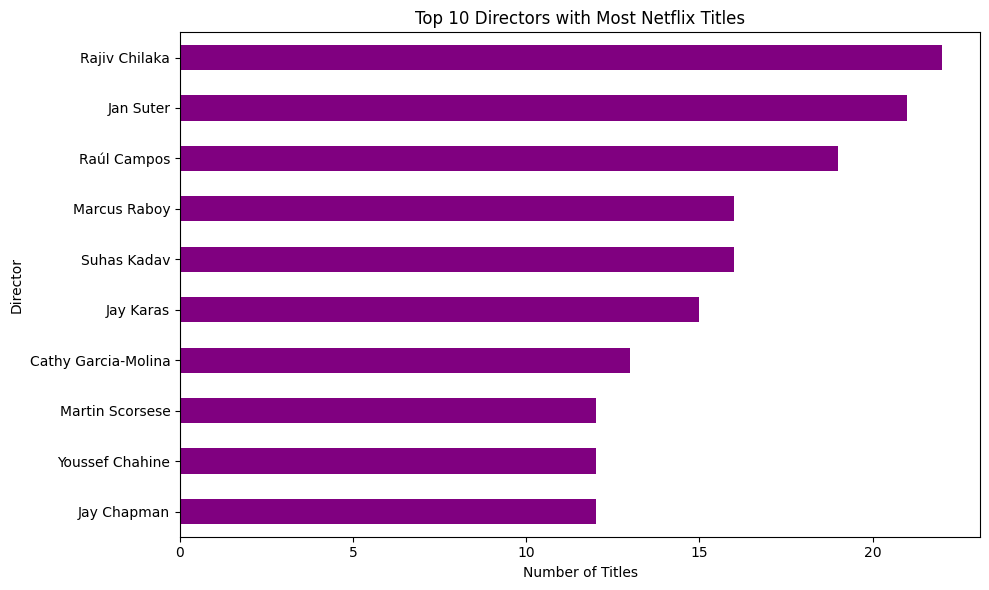

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing director names
directors = df['director'].dropna()

# Split multiple directors (some entries have multiple names separated by commas)
all_directors = directors.str.split(',', expand=True).stack().str.strip()

# Count how many titles each director has
director_counts = all_directors.value_counts().head(10)

# Display as table
print("Top 10 Directors with Most Netflix Titles:")
display(director_counts.to_frame(name='Number of Titles'))

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
director_counts.sort_values().plot(kind='barh', color='purple')
plt.title('Top 10 Directors with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


In [11]:
#12 : Which actors appear most frequently in Netflix shows?

Top 10 Most Frequent Actors in Netflix TV Shows:


,Number of Appearances
Takahiro Sakurai,25
Yuki Kaji,19
Daisuke Ono,17
Junichi Suwabe,17
Ai Kayano,17
Yuichi Nakamura,16
Jun Fukuyama,15
Yoshimasa Hosoya,15
David Attenborough,14
Mamoru Miyano,13


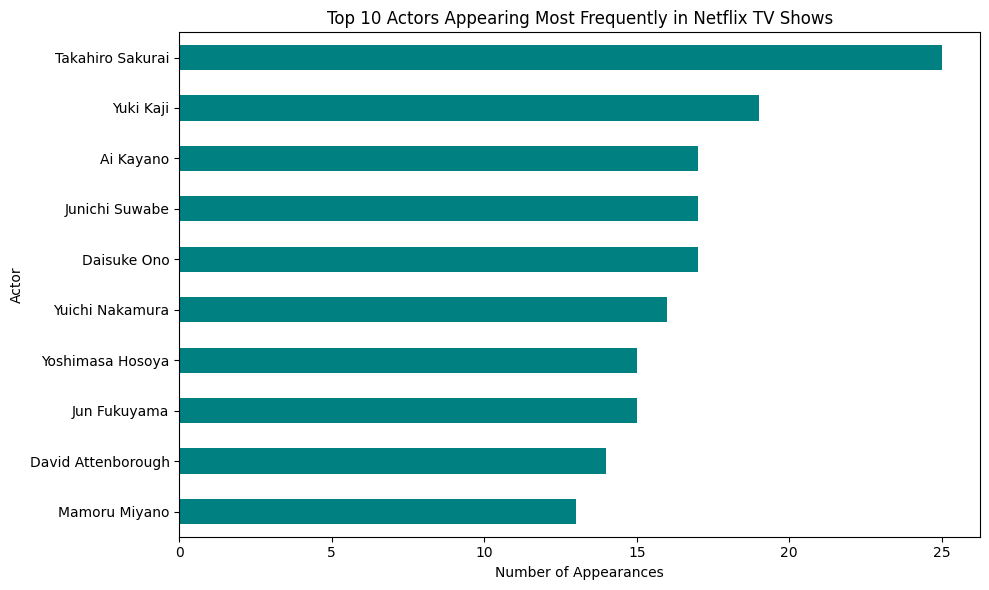

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show']

# Drop missing cast entries
actors = tv_shows['cast'].dropna()

# Split multiple actors in a single row (comma-separated)
all_actors = actors.str.split(',', expand=True).stack().str.strip()

# Count actor appearances
actor_counts = all_actors.value_counts().head(10)

# Display as table
print("Top 10 Most Frequent Actors in Netflix TV Shows:")
display(actor_counts.to_frame(name='Number of Appearances'))

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
actor_counts.sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Actors Appearing Most Frequently in Netflix TV Shows')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


In [13]:
#13: Which director-genre pairs are most frequent?

Top 10 Most Frequent Director–Genre Pairs on Netflix:


,director,listed_in,count
8097,Rajiv Chilaka,Children & Family Movies,19
8227,"Raúl Campos, Jan Suter",Stand-Up Comedy,18
9725,Suhas Kadav,Children & Family Movies,16
6150,Marcus Raboy,Stand-Up Comedy,15
1659,Cathy Garcia-Molina,International Movies,13
4251,Jay Karas,Stand-Up Comedy,13
4242,Jay Chapman,Stand-Up Comedy,12
10802,Youssef Chahine,Dramas,12
10804,Youssef Chahine,International Movies,10
1658,Cathy Garcia-Molina,Dramas,9


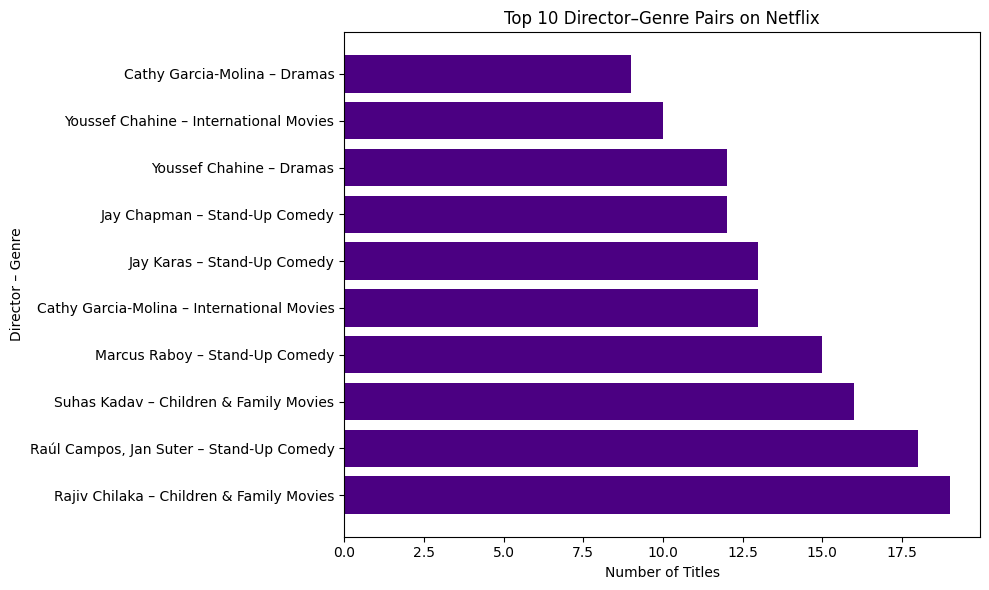

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing directors or genres
df_pairs = df.dropna(subset=['director', 'listed_in'])

# Split multiple genres per title
df_pairs = df_pairs.assign(listed_in=df_pairs['listed_in'].str.split(','))

# Explode so each (director, genre) combination becomes one row
df_pairs = df_pairs.explode('listed_in')

# Clean whitespace
df_pairs['listed_in'] = df_pairs['listed_in'].str.strip()

# Count frequency of each (director, genre) pair
pair_counts = (
    df_pairs.groupby(['director', 'listed_in'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(10)
)

# Display as table
print("Top 10 Most Frequent Director–Genre Pairs on Netflix:")
display(pair_counts)

# Plot
plt.figure(figsize=(10,6))
plt.barh(
    pair_counts['director'] + ' – ' + pair_counts['listed_in'],
    pair_counts['count'],
    color='indigo'
)
plt.title('Top 10 Director–Genre Pairs on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director – Genre')
plt.tight_layout()
plt.show()


In [15]:
#14: How many titles have unknown directors or cast members?

In [16]:
# Count titles with missing directors or cast
unknown_directors = df['director'].isna().sum()
unknown_cast = df['cast'].isna().sum()

# Total records
total_titles = len(df)

# Display results
print(f"Total Titles: {total_titles}")
print(f"Titles with Unknown Directors: {unknown_directors} ({(unknown_directors/total_titles)*100:.2f}%)")
print(f"Titles with Unknown Cast Members: {unknown_cast} ({(unknown_cast/total_titles)*100:.2f}%)")


Total Titles: 8807
Titles with Unknown Directors: 2634 (29.91%)
Titles with Unknown Cast Members: 825 (9.37%)


In [17]:
#15:  What is the average duration of Movies on Netflix?

In [19]:
# Filter only movies (use .copy() to avoid warning)
movies = df[df['type'] == 'Movie'].copy()

# Extract numeric duration
movies['duration_num'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

# Calculate average
avg_duration = movies['duration_num'].mean()

print(f"🎬 Average Movie Duration on Netflix: {avg_duration:.2f} minutes")


🎬 Average Movie Duration on Netflix: 99.58 minutes


In [20]:
#16: What’s the most common number of seasons for TV shows?

📺 Most Common Number of Seasons: 1
Number of Shows with 1 Season(s): 1793


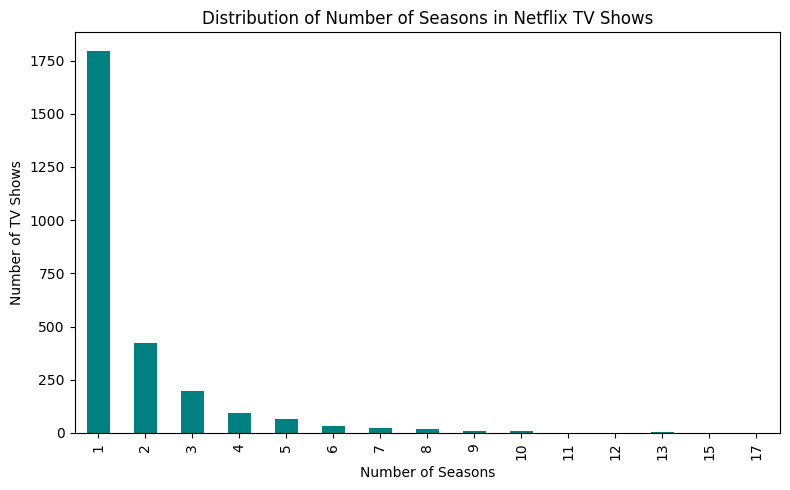

In [21]:
# Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract numeric number of seasons
tv_shows['seasons_num'] = tv_shows['duration'].str.replace(' Season', '', regex=False).str.replace('s', '', regex=False).astype(int)

# Find most common number of seasons
most_common_seasons = tv_shows['seasons_num'].mode()[0]
count_common = (tv_shows['seasons_num'] == most_common_seasons).sum()

print(f"📺 Most Common Number of Seasons: {most_common_seasons}")
print(f"Number of Shows with {most_common_seasons} Season(s): {count_common}")

# Plot distribution
tv_shows['seasons_num'].value_counts().sort_index().plot(
    kind='bar',
    color='teal',
    figsize=(8,5),
    title='Distribution of Number of Seasons in Netflix TV Shows'
)
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.tight_layout()
plt.show()


In [22]:
#17: Is there a trend in movie durations over the years?

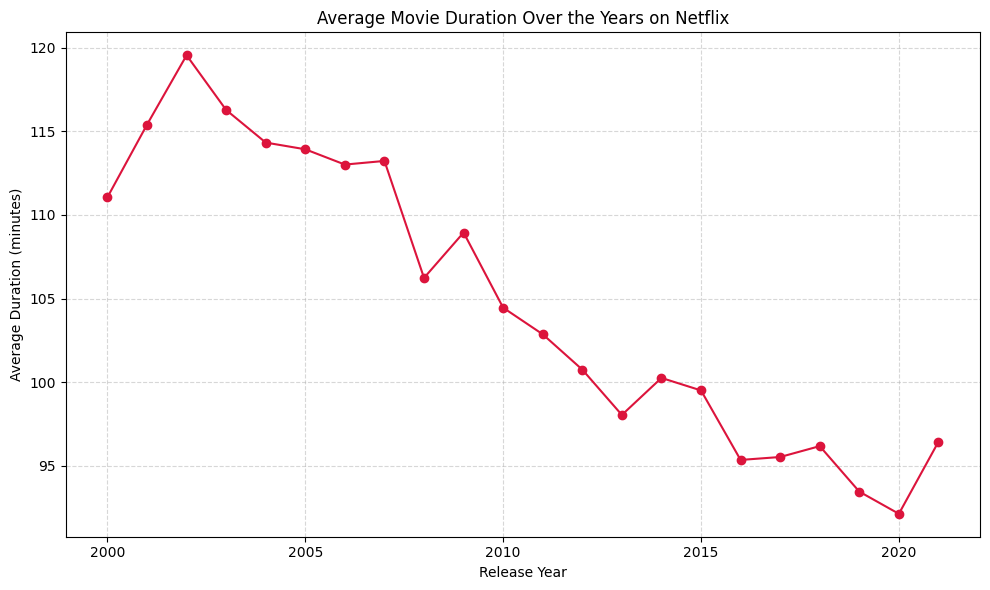

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter only Movies and ensure data integrity
movies = df[df['type'] == 'Movie'].copy()

# Clean duration (convert "90 min" -> 90)
movies['duration_num'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)

# Drop missing release years or durations
movies = movies.dropna(subset=['release_year', 'duration_num'])

# Group by release year and calculate average duration
yearly_duration = movies.groupby('release_year')['duration_num'].mean().reset_index()

# Filter to recent years (optional, e.g., after 2000 for clarity)
yearly_duration = yearly_duration[yearly_duration['release_year'] >= 2000]

# Plot trend
plt.figure(figsize=(10,6))
plt.plot(yearly_duration['release_year'], yearly_duration['duration_num'], color='crimson', marker='o')
plt.title('Average Movie Duration Over the Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [25]:
#18: In which months does Netflix add the most content?

,Number of Titles Added
month_added,
January,727
February,557
March,734
April,759
May,626
June,724
July,819
August,749
September,765


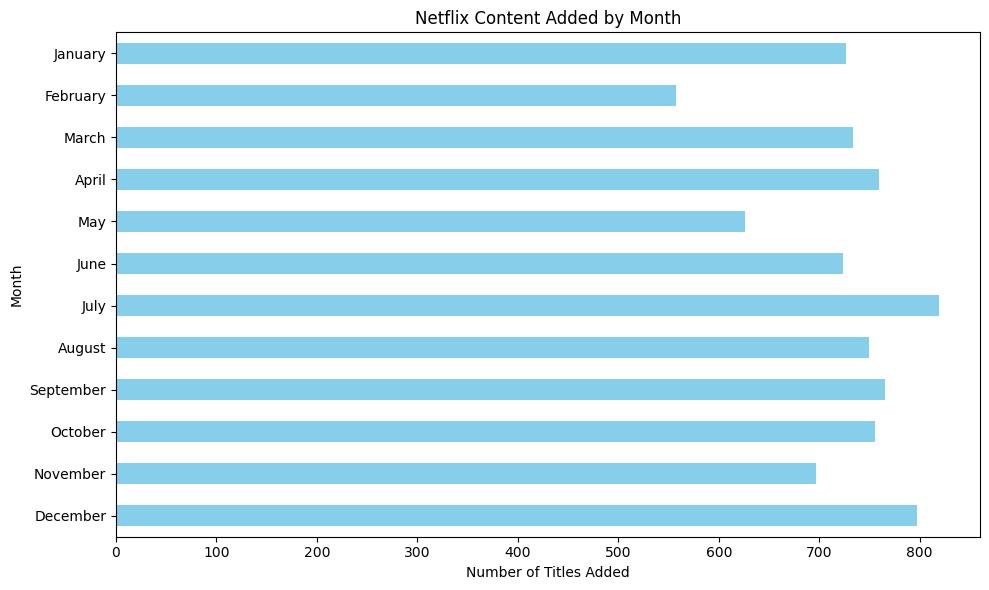

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop missing dates
df_month = df.dropna(subset=['date_added']).copy()

# Extract month name
df_month['month_added'] = df_month['date_added'].dt.month_name()

# Count number of titles added per month
month_counts = df_month['month_added'].value_counts()

# Optional: order months correctly
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
month_counts = month_counts.reindex(months_order)

# Display table
from IPython.display import display
display(month_counts.to_frame(name='Number of Titles Added'))

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
month_counts.plot(kind='barh', color='skyblue')
plt.title('Netflix Content Added by Month')
plt.xlabel('Number of Titles Added')
plt.ylabel('Month')
plt.gca().invert_yaxis()  # highest month on top
plt.tight_layout()
plt.show()


In [27]:
#19 : How does the genre distribution vary across different years?

listed_in,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
release_year,,,,,,,,,,,,,,,,,,,,,
2012,29,2,4,9,21,0,0,61,6,2,...,1,20,17,0,0,0,0,0,1,9
2013,29,4,5,10,34,1,0,65,9,2,...,2,14,18,0,1,1,0,1,0,15
2014,28,2,11,7,29,0,0,79,11,0,...,4,14,22,3,1,5,1,1,3,39
2015,53,2,11,22,23,2,0,94,25,0,...,5,37,50,8,6,5,1,8,4,32
2016,80,5,11,30,45,1,0,150,39,1,...,9,47,73,4,7,4,0,3,5,72
2017,89,6,10,34,55,1,0,164,54,1,...,8,57,77,4,9,4,2,3,5,68
2018,81,8,24,37,69,2,1,178,79,1,...,28,82,109,11,15,7,0,7,8,83
2019,44,6,18,26,82,3,0,159,92,0,...,35,75,133,16,16,14,2,16,14,71
2020,46,3,21,33,83,3,0,133,87,0,...,32,105,127,17,27,19,2,7,11,45


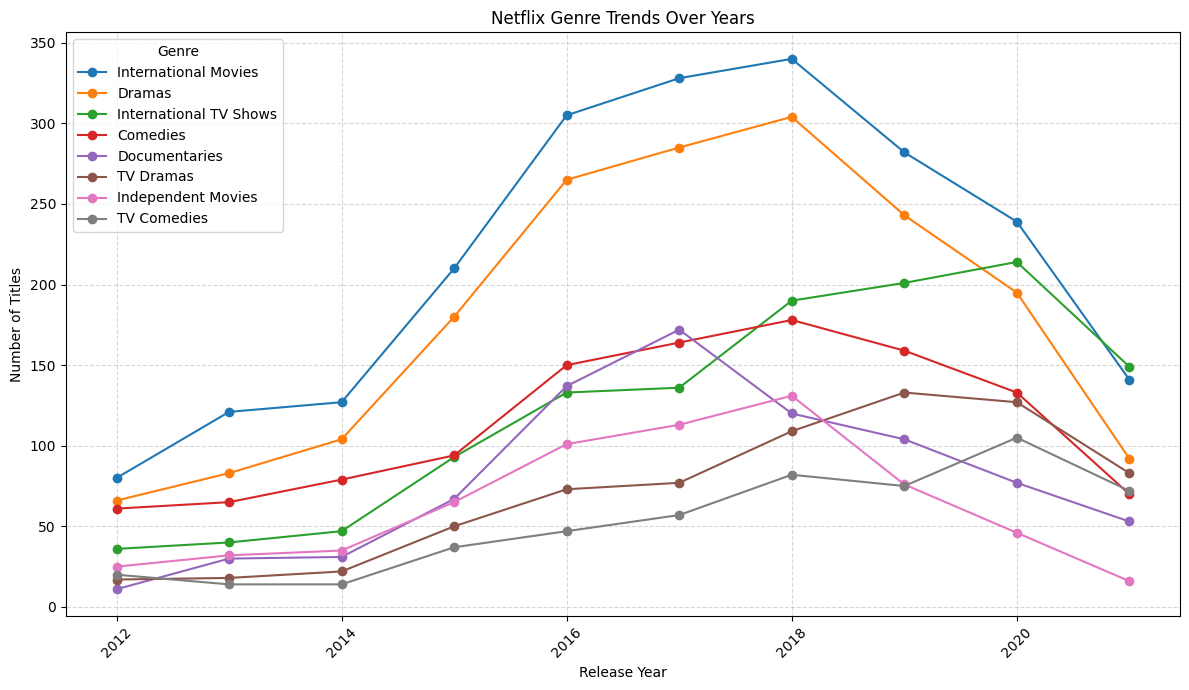

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing genre or release year
df_genre_year = df.dropna(subset=['listed_in', 'release_year']).copy()

# Split multiple genres into separate rows
df_genre_year = df_genre_year.assign(listed_in=df_genre_year['listed_in'].str.split(',')).explode('listed_in')
df_genre_year['listed_in'] = df_genre_year['listed_in'].str.strip()

# Optional: focus on recent years for clarity
df_genre_year = df_genre_year[df_genre_year['release_year'] >= 2012]

# Create pivot table: rows=year, columns=genre, values=count of titles
genre_year_counts = df_genre_year.pivot_table(index='release_year', 
                                              columns='listed_in', 
                                              aggfunc='size', 
                                              fill_value=0)
# Display table
from IPython.display import display
display(genre_year_counts)

plt.figure(figsize=(12,7))

# Option: plot only top 8 genres by total count for clarity
top_genres = genre_year_counts.sum().sort_values(ascending=False).head(8).index
for genre in top_genres:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], marker='o', label=genre)

plt.title('Netflix Genre Trends Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [30]:
#20: Which countries produce the most content in each genre?

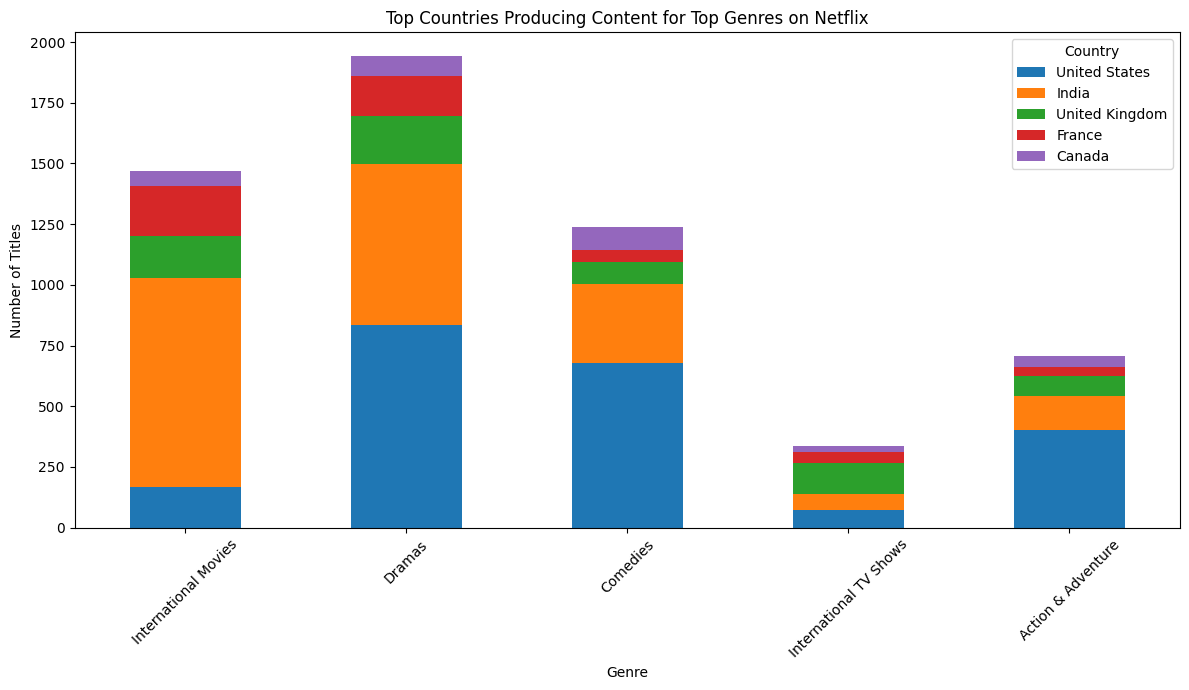

In [35]:
# Drop rows with missing country or genre
df_country_genre = df.dropna(subset=['country', 'listed_in']).copy()

# Split multiple genres
df_country_genre = df_country_genre.assign(listed_in=df_country_genre['listed_in'].str.split(',')).explode('listed_in')
df_country_genre['listed_in'] = df_country_genre['listed_in'].str.strip()

# Split multiple countries per title
df_country_genre = df_country_genre.assign(country=df_country_genre['country'].str.split(',')).explode('country')
df_country_genre['country'] = df_country_genre['country'].str.strip()

# Pivot table: rows=genre, columns=country, values=count
country_genre_counts = df_country_genre.pivot_table(index='listed_in',
                                                    columns='country',
                                                    aggfunc='size',
                                                    fill_value=0)

# Display table
from IPython.display import display


# For clarity, choose top 5 genres and top 5 countries overall
top_genres = country_genre_counts.sum(axis=1).sort_values(ascending=False).head(5).index
top_countries = country_genre_counts.sum(axis=0).sort_values(ascending=False).head(5).index

subset = country_genre_counts.loc[top_genres, top_countries]

# Stacked bar chart
subset.plot(kind='bar', figsize=(12,7), stacked=True)
plt.title('Top Countries Producing Content for Top Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()
